In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

import random
import time

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# Fijar la semilla
semilla = 42

random.seed(semilla) # Python
np.random.seed(semilla) # NumPy y Pandas
tf.random.set_seed(semilla) # TensorFlow

In [4]:
# Cargar el conjunto de entrenamiento
datos = pd.read_csv('datasets/fashion-mnist/fashion-mnist_train.csv')

# Extraer etiquetas y píxeles
etiquetas = datos['label']
imagenes = datos.drop('label', axis=1).values

In [8]:
etiquetas_nombre = np.array([
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
])

In [5]:
np.unique(imagenes)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [22]:
def malla_imagenes(img, label, classes):
    imgShaped = img.reshape(-1, 28, 28)
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(imgShaped[i], cmap='gray')
        ax.set_title(classes[label[i]])
        ax.axis('off')
    plt.show()

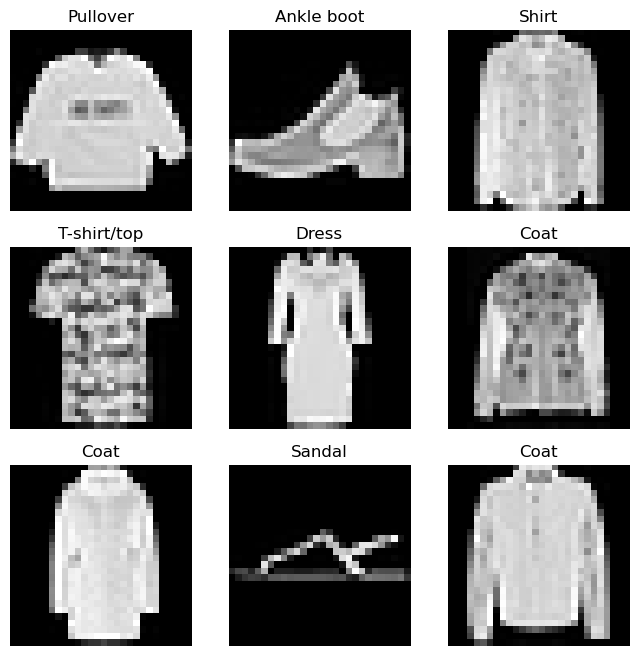

In [23]:
# Mostrar algunas imágenes
malla_imagenes(imagenes, etiquetas, etiquetas_nombre)

In [39]:
# Número de etiquetas por clase
valores, totales = np.unique(etiquetas, return_counts=True)
for valor, total in zip(valores, totales):
    print(f"{valor}: {total}")

0: 6000
1: 6000
2: 6000
3: 6000
4: 6000
5: 6000
6: 6000
7: 6000
8: 6000
9: 6000


In [93]:
# Escalar las imágenes entre 0 y 1
imagenes = imagenes / 255.0

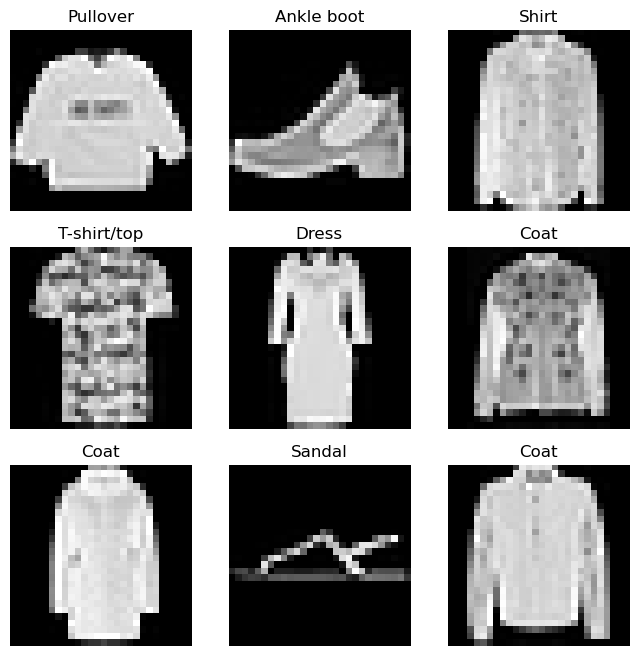

In [90]:
malla_imagenes(imagenes[0:9])

In [105]:
# Dividir en entrenamiento y validación (80%-20%)
trainX, validX, trainY, validY = train_test_split(imagenes, etiquetas, test_size = 0.2, stratify = etiquetas, random_state = semilla)

In [100]:
validX.shape

(12000, 784)

In [69]:
trainX.shape

(60000, 784)

In [110]:
# Cargar el conjunto de prueba
test = pd.read_csv('fashion-mnist/fashion-mnist_test.csv')

# Extraer etiquetas y píxeles
testY = test['label']
testX = test.drop('label', axis=1).values / 255.0

In [116]:
# Crear el modelo con la configuración 1

def crearModelo1():
    funcActivacion = "relu"
    dropout = 0.2
    lr = 0.001
    
    modelo = Sequential([
        # Input + Capa oculta 1
        Dense(256, activation=funcActivacion, input_shape=(trainX.shape[1],)),
        Dropout(dropout),
        
        # Capa oculta 2
        Dense(128, activation=funcActivacion),
        Dropout(dropout),
        
        # Capa de salida
        Dense(10, activation='softmax')
    ])
    
    # Compilar el modelo
    modelo.compile(
        optimizer = Adam(learning_rate = lr),             
        loss = 'sparse_categorical_crossentropy',  # Loss para clases mutuamente excluyentes
        metrics = ['accuracy']
    )
    
    # Mostrar la estructura del modelo
    modelo.summary()

    return modelo


In [118]:
# Crear el modelo con la configuración 1

def crearModelo2():
    funcActivacion = "relu"
    dropout = 0.2
    lr = 0.001
    
    modelo = Sequential([
        # Input + Capa oculta 1
        Dense(512, activation=funcActivacion, input_shape=(trainX.shape[1],)),
        Dropout(dropout),
        
        # Capa oculta 2
        Dense(512, activation=funcActivacion),
        Dropout(dropout),
        
        # Capa oculta 2
        Dense(256, activation=funcActivacion),
        Dropout(dropout),
        
        # Capa oculta 2
        Dense(256, activation=funcActivacion),
        Dropout(dropout),
        
        # Capa oculta 2
        Dense(128, activation=funcActivacion),
        Dropout(dropout),
        
        # Capa de salida
        Dense(10, activation='softmax')
    ])
    
    # Compilar el modelo
    modelo.compile(
        optimizer = Adam(learning_rate = lr),             
        loss = 'sparse_categorical_crossentropy',  # Loss para clases mutuamente excluyentes
        metrics = ['accuracy']
    )
    
    # Mostrar la estructura del modelo
    modelo.summary()

    return modelo


In [117]:
modelo1 = crearModelo1()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [108]:
# Entrenamiento midiendo el tiempo
inicio = time.time()

history = modelo1.fit(trainX, trainY, epochs = 30, validation_data = (validX, validY))

fin = time.time()

# Calcular el tiempo transcurrido
tiempo = fin - inicio
print(f"Tiempo de entrenamiento: {tiempo:.2f} segundos")

Epoch 1/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5678 - accuracy: 0.7939 - val_loss: 0.4274 - val_accuracy: 0.8375
Epoch 2/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4237 - accuracy: 0.8461 - val_loss: 0.3719 - val_accuracy: 0.8612
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3903 - accuracy: 0.8576 - val_loss: 0.3460 - val_accuracy: 0.8727
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3637 - accuracy: 0.8664 - val_loss: 0.3529 - val_accuracy: 0.8694
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3494 - accuracy: 0.8726 - val_loss: 0.3394 - val_accuracy: 0.8728
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3333 - accuracy: 0.8772 - val_loss: 0.3318 - val_accuracy: 0.8791
Epoch 7/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3219 - accuracy: 0.8810 - val_loss: 0.3347 - val_accuracy:

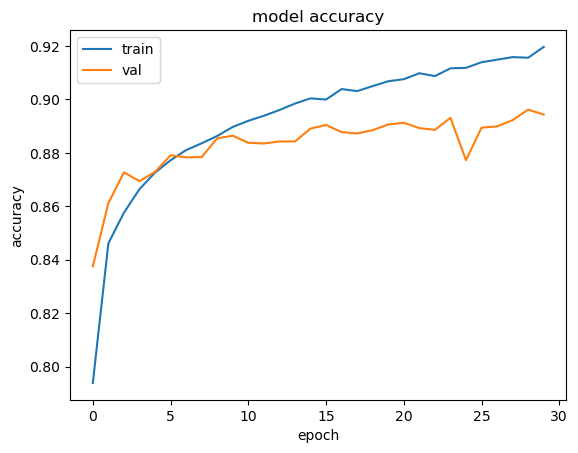

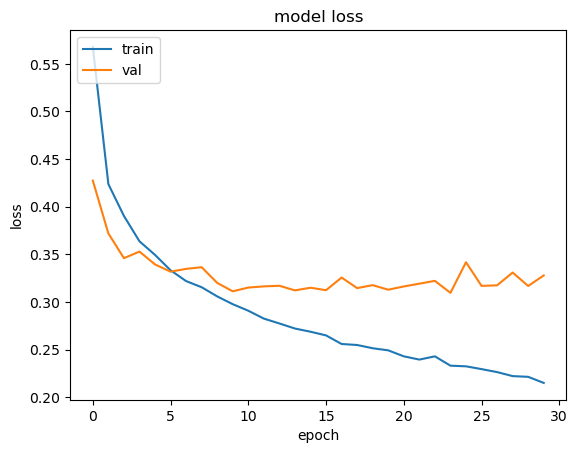

In [109]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [115]:
modelo1.evaluate(testX, testY)

313/313 [==============================] - 1s 2ms/step - loss: 0.3249 - accuracy: 0.8960


[0.3248679041862488, 0.8960000276565552]

In [119]:
modelo2 = crearModelo2()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 256)              

In [120]:
# Entrenamiento midiendo el tiempo
inicio = time.time()

history = modelo2.fit(trainX, trainY, epochs = 30, validation_data = (validX, validY))

fin = time.time()

# Calcular el tiempo transcurrido
tiempo = fin - inicio
print(f"Tiempo de entrenamiento: {tiempo:.2f} segundos")

Epoch 1/30
1500/1500 [==============================] - 11s 7ms/step - loss: 0.6292 - accuracy: 0.7729 - val_loss: 0.4522 - val_accuracy: 0.8357
Epoch 2/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4643 - accuracy: 0.8368 - val_loss: 0.4278 - val_accuracy: 0.8497
Epoch 3/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4311 - accuracy: 0.8487 - val_loss: 0.3879 - val_accuracy: 0.8612
Epoch 4/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4061 - accuracy: 0.8587 - val_loss: 0.3580 - val_accuracy: 0.8669
Epoch 5/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3912 - accuracy: 0.8640 - val_loss: 0.3576 - val_accuracy: 0.8658
Epoch 6/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3812 - accuracy: 0.8676 - val_loss: 0.3572 - val_accuracy: 0.8705
Epoch 7/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3698 - accuracy: 0.8696 - val_loss: 0.3607 - val_ac

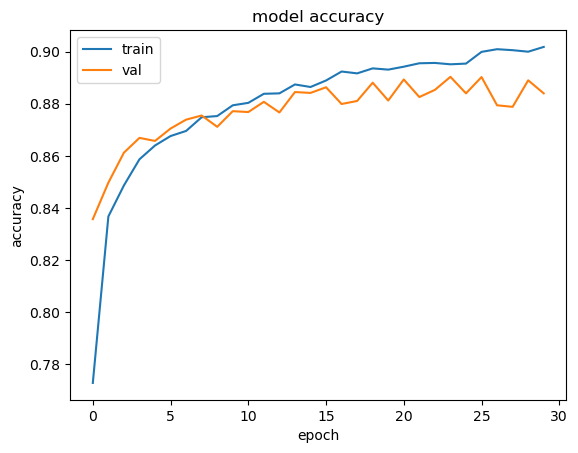

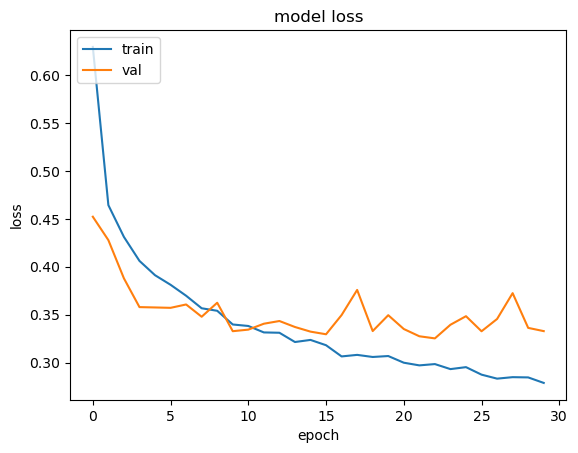

In [121]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [122]:
modelo2.evaluate(testX, testY)

313/313 [==============================] - 1s 2ms/step - loss: 0.3341 - accuracy: 0.8836


[0.33414793014526367, 0.8835999965667725]